In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [11]:
df = pd.read_json('export.log', lines = True)

df = (pd.DataFrame(df['jsonPayload'].values.tolist())
        .add_prefix('jsonPayload.')
        .join(df.drop('jsonPayload', 1)))
df = (pd.DataFrame(df['jsonPayload.connection'].values.tolist())
        .add_prefix('jsonPayload.connection.')
        .join(df.drop('jsonPayload.connection', 1)))
df = df.astype({'jsonPayload.bytes_sent': 'int32'})
# df = df.astype({'jsonPayload.connection.src_port': 'int32'})
# df = df.astype({'jsonPayload.connection.dest_port': 'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87048 entries, 0 to 87047
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   jsonPayload.connection.src_ip     87048 non-null  object             
 1   jsonPayload.connection.protocol   87048 non-null  int64              
 2   jsonPayload.connection.src_port   87000 non-null  float64            
 3   jsonPayload.connection.dest_ip    87048 non-null  object             
 4   jsonPayload.connection.dest_port  87000 non-null  float64            
 5   jsonPayload.end_time              87048 non-null  object             
 6   jsonPayload.bytes_sent            87048 non-null  int32              
 7   jsonPayload.start_time            87048 non-null  object             
 8   jsonPayload.reporter              87048 non-null  object             
 9   jsonPayload.src_vpc               56981 non-null  object     

In [12]:
fromClient = df[df['jsonPayload.connection.src_ip']=='10.2.0.5']
fromClientTo4 = fromClient[fromClient['jsonPayload.connection.dest_ip']=='10.2.0.4']
fromClientTo4 = fromClientTo4[fromClientTo4['jsonPayload.connection.dest_port']==8080]
# fromClientTo4 = fromClientTo4[fromClientTo4['jsonPayload.bytes_sent']>200]
fromClientTo4.head()
fromClientTo4['jsonPayload.connection.protocol'].value_counts()
fromClientTo4['jsonPayload.bytes_sent'].value_counts()
# fromClientTo4.info()

161    9497
0      1915
322     430
184     195
215     118
       ... 
228       1
333       1
354       1
167       1
198       1
Name: jsonPayload.bytes_sent, Length: 64, dtype: int64

(array([1.915e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.504e+03, 1.240e+02,
        2.300e+02, 6.000e+01, 3.500e+01, 1.180e+02, 8.000e+00, 1.100e+01,
        4.000e+00, 3.700e+01, 5.000e+00, 0.000e+00, 0.000e+00, 3.300e+01,
        6.000e+00, 0.000e+00, 4.300e+02, 1.000e+00, 1.800e+01, 1.000e+00,
        1.100e+01, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

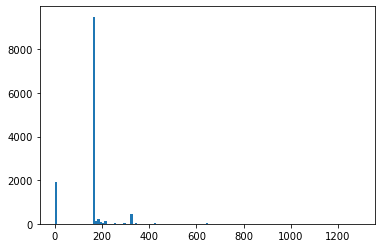

In [13]:
fig, ax = plt.subplots()
# plot histogram
binwidth = 10
ax.hist(fromClientTo4['jsonPayload.bytes_sent'], bins=range(min(fromClientTo4['jsonPayload.bytes_sent']), max(fromClientTo4['jsonPayload.bytes_sent']) + binwidth, binwidth))

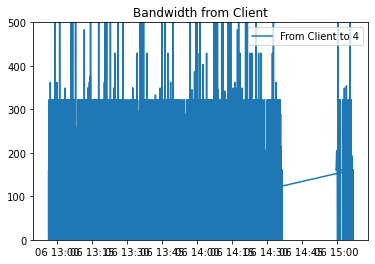

In [14]:
columns = fromClient[["jsonPayload.bytes_sent"]]
# create x data
x_data = range(0, fromClient.shape[0])
# create figure and axis
fig, ax = plt.subplots()
ax.set_ylim(0,500)
# plot each column
# fromClientTo4.groupby(fromClientTo4["timestamp"].dt.minute)["jsonPayload.bytes_sent"].mean().plot(
#     kind='bar', rot=0, ax=ax
# )
ax.plot(fromClientTo4["timestamp"], fromClientTo4["jsonPayload.bytes_sent"], label="From Client to 4")
# set title and legend
ax.set_title('Bandwidth from Client')
ax.legend()